<a href="https://colab.research.google.com/github/SakshiKasture/Sentiment-Analysis-with-RNNs-Using-the-IMDB-Dataset/blob/main/Sentiment_analysis_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [6]:
# Load IMDB dataset
num_words = 10000  # Use the top 10,000 most frequent words
(x_data, y_data), _ = imdb.load_data(num_words=num_words)
maxlen = 200 #Maximum review length
x_data = pad_sequences(x_data, maxlen=maxlen)
x_train, x_temp, y_train, y_temp = train_test_split(x_data, y_data, test_size=0.4, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)
# Pad sequences to ensure uniform input length
#x_train = pad_sequences(x_train, maxlen=max_length, padding='post')
#x_test = pad_sequences(x_test, maxlen=max_length, padding='post')

In [8]:
#Building the model
'''Embedding Layer Purpose: Converts word indices into dense vectors of fixed size.input_dim=vocab_size: The size of the vocabulary
(i.e., the total number of unique words that the model can recognize). Each word index is mapped to a dense vector.
output_dim=64: The size of the dense word embeddings. Each word index will be transformed into a 64-dimensional vector.
The 64 in the embedding layer is the size of the word vectors. It's a hyperparameter that controls how much information each word's
representation can capture. More dimensions can encode more features but increase computational cost.
Converts the sequence of word indices (e.g., [2, 56, 78]) into a sequence of dense word vectors (e.g., [[0.1, 0.2, ...], [0.3, 0.4, ...], ...]).
SimpleRNN Layer : The number of units (hidden states) in the RNN layer. It controls the capacity of the model to learn patterns from the data.
activation='tanh': The activation function applied to the output of the RNN. tanh is commonly used for RNNs because it helps manage gradients during training.
Purpose: Processes the sequence of word embeddings to extract temporal (time-related) features.
Processes the word embeddings sequentially, step by step, maintaining a "hidden state" that evolves with the sequence.
It captures the context and relationships between words in the sequence.
Dense Layer
Purpose: The final layer, used for prediction.
Parameters:
1: The number of output units. Since this is binary classification (positive vs. negative sentiment), we use a single unit.
activation='sigmoid': Outputs a probability value between 0 and 1, representing the likelihood of the input belonging to the "positive" class.
What It Does: Based on the features learned by the RNN, the dense layer predicts the probability of the sentiment being positive.
Input: The sequence of word indices (e.g., [2, 56, 78]) from a review.
Embedding: Transforms the indices into dense vectors (e.g., [[0.1, 0.2], [0.3, 0.4], ...]).
SimpleRNN: Processes the sequence to learn context and relationships between words.
Dense: Outputs a probability for the sentiment (e.g., 0.85, meaning 85% positive sentiment).
The embedding layer converts sparse word indices into meaningful dense vectors.
The RNN captures the sequential and contextual relationships in the review.
The dense layer translates the features into a final prediction for sentiment classification.'''

model = Sequential([
    Embedding(input_dim=num_words, output_dim=64, input_length=maxlen),
    SimpleRNN(128, activation='tanh'),
    Dense(1, activation='sigmoid')  # Binary classification (positive or negative)
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [9]:
#Training the model
'''Validation data helps assess how well the model generalizes to unseen data during training.
By observing validation loss and accuracy after each epoch, we can detect overfitting or underfitting early.
Monitoring validation metrics helps decide when to stop training (e.g., with early stopping) to prevent overfitting to the training data.
evaluation with test data is done after training is complete to measure the model's final performance on truly unseen data.'''
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_val, y_val))

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 34s 134ms/step - accuracy: 0.5292 - loss: 0.6890 - val_accuracy: 0.5292 - val_loss: 1.0593
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 40s 129ms/step - accuracy: 0.7125 - loss: 0.5904 - val_accuracy: 0.8114 - val_loss: 0.4383
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 41s 130ms/step - accuracy: 0.8401 - loss: 0.3785 - val_accuracy: 0.6792 - val_loss: 0.5901
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 41s 130ms/step - accuracy: 0.7987 - loss: 0.4377 - val_accuracy: 0.7902 - val_loss: 0.4749
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 41s 132ms/step - accuracy: 0.8379 - loss: 0.3949 - val_accuracy: 0.8186 - val_loss: 0.4373


In [10]:
#Evaluation of the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")

157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.8149 - loss: 0.4330
Test Accuracy: 0.81


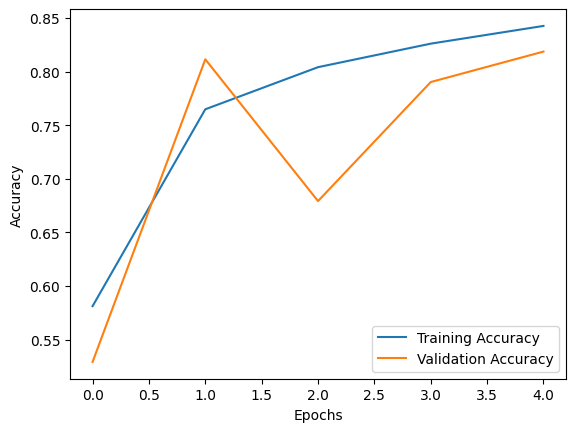

In [11]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()